# Salary Dependending On YearsExperience

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sympy import symbols,diff

## Importing Dataset

In [2]:
data = pd.read_csv('Salary.csv')

In [3]:
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


## Checking Missing Values

In [4]:
data.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [5]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [6]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## DATA VISUALISATION

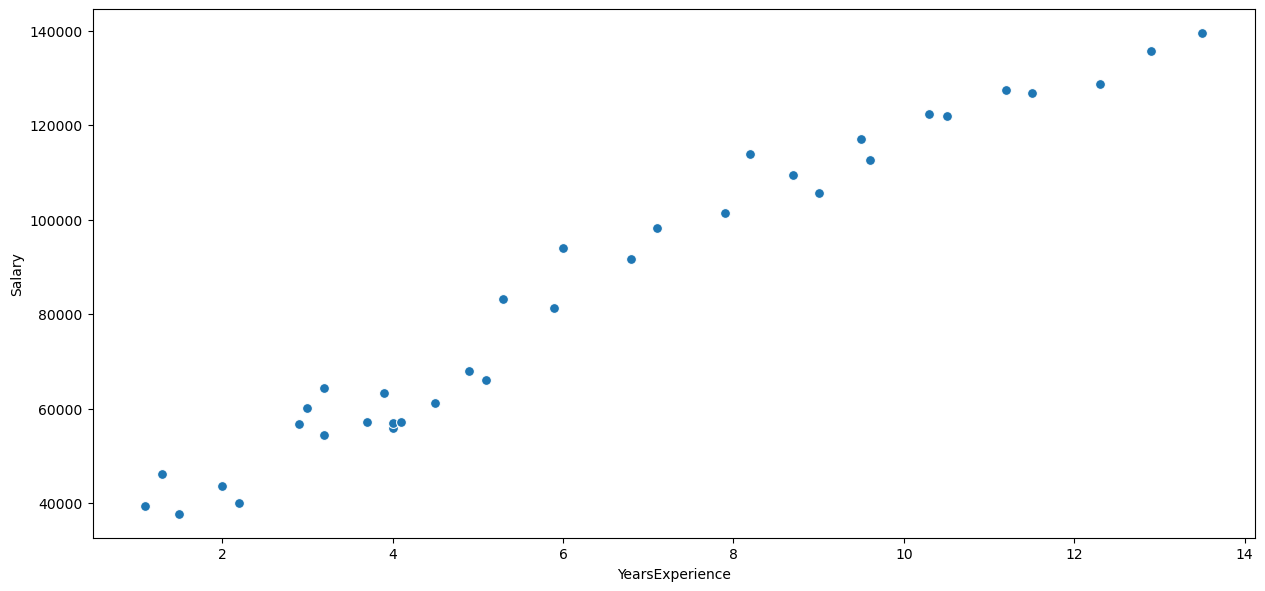

In [7]:
plt.figure(figsize=(15,7),dpi=100)
sns.scatterplot(data['YearsExperience'], data['Salary'], s=50)
plt.show()

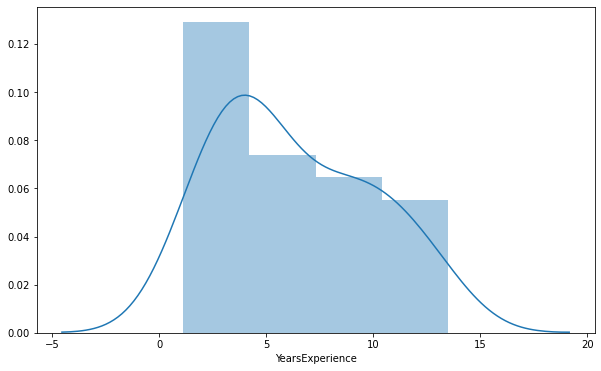

In [8]:
plt.figure(figsize= (10,6))
sns.distplot(data['YearsExperience'])
plt.show()

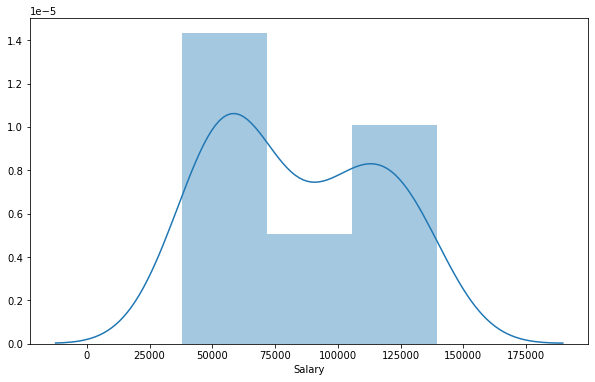

In [9]:
plt.figure(figsize= (10,6))
sns.distplot(data['Salary'])
plt.show()

## Splitting Data

In [10]:
x = np.array(data['YearsExperience']).reshape(-1,1)
y = np.array(data['Salary']).reshape(-1,1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.10, random_state=42)

## Linear Regression Model

In [12]:
regr = LinearRegression()

In [13]:
regr.fit(X_train,y_train)

LinearRegression()

In [14]:
c = regr.intercept_
c

array([29299.23882772])

In [15]:
m = regr.coef_[0]
m

array([8610.58305298])

In [16]:
regr.score(X_train, y_train)

0.9674494484041021

## Predictions

In [17]:
pred_y = regr.predict(X_test)

In [18]:
r2_score(y_test, pred_y)

0.9159708701060871

In [19]:
y_hat = c + m*X_train

In [20]:
y_hat

array([[ 71491.09578733],
       [119710.36088403],
       [ 80962.73714561],
       [ 63741.57103965],
       [ 56853.10459726],
       [ 73213.21239793],
       [ 61158.39612375],
       [140375.76021118],
       [ 38770.880186  ],
       [ 48242.52154428],
       [ 74935.32900852],
       [111960.83613634],
       [ 54269.92968137],
       [ 63741.57103965],
       [ 40492.9967966 ],
       [ 42215.11340719],
       [135209.41037939],
       [ 46520.40493368],
       [125737.76902111],
       [ 99906.01986217],
       [128320.94393701],
       [ 62880.51273435],
       [ 97322.84494627],
       [ 80101.67884031],
       [106794.48630455],
       [ 55130.98798667],
       [ 87851.20358799],
       [145542.11004297],
       [ 56853.10459726],
       [ 68046.86256614],
       [117988.24427343]])

In [21]:
mean_squared_error(y_train, y_hat)

34058031.364935495

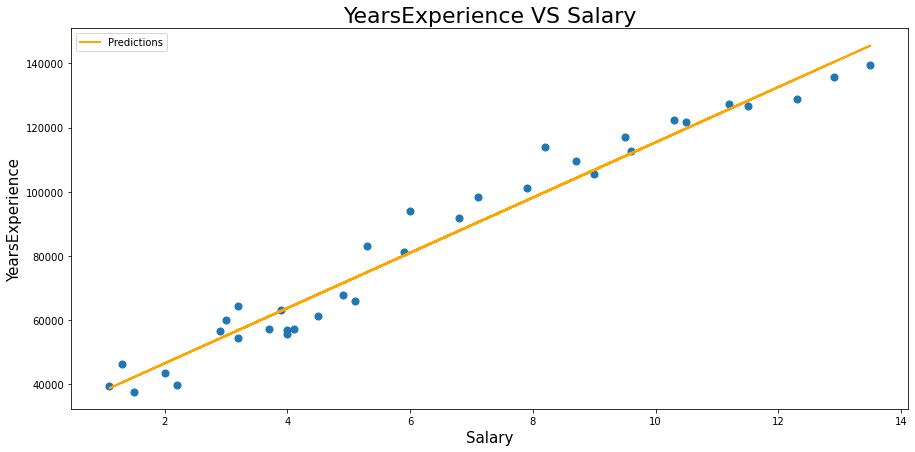

In [22]:
plt.figure(figsize=(15, 7))
plt.scatter(data['YearsExperience'], data['Salary'], s=50)
plt.plot(X_train, y_hat, color='orange', linewidth=2, label = 'Predictions')
plt.title('YearsExperience VS Salary', fontsize = 22)
plt.xlabel('Salary', fontsize = 15)
plt.ylabel('YearsExperience', fontsize = 15)
plt.legend()
plt.show()

# GRADIENT DESCENT

## Create Surface

In [23]:
nr_thetas = 200
th_0 = np.linspace(start=29000, stop=30000, num=nr_thetas)
th_1 = np.linspace(start=8400, stop=8900, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

In [24]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_pred = plot_t0[i][j] + plot_t1[i][j]*X_train
        plot_cost[i][j] = mean_squared_error(y_train, y_pred)
        

print('value of plot_cost', plot_cost.min())

value of plot_cost 34058034.43479841


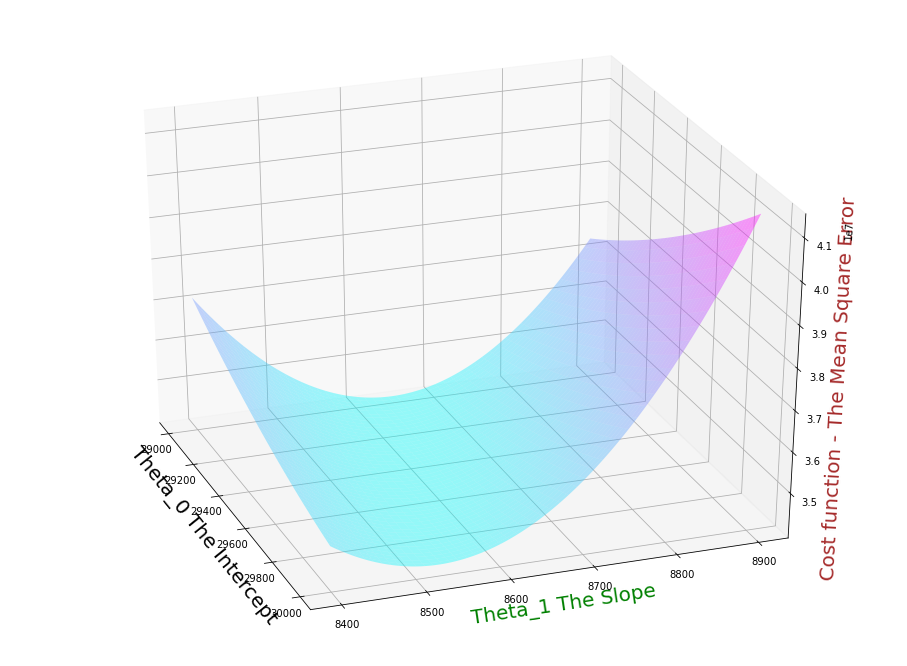

In [25]:
fig = plt.figure(figsize=(16, 12))
ax = fig.gca(projection='3d')
ax.set_xlabel('Theta_0 The Intercept', fontsize=20, color ='black')
ax.set_ylabel('Theta_1 The Slope', fontsize=20, color ='green')
ax.set_zlabel('Cost function - The Mean Square Error', fontsize=20, color = 'brown')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap='cool', alpha =0.4)
#ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.twilight, alpha =1)
#ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.Pastel1, alpha =0.6 )
#ax.plot_surface(plot_t0, plot_t1, plot_cost, color = 'blue', alpha =0.8,  )
#ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.PiYG, alpha =0.6  ) 
ax.azim = -20
plt.show()

In [26]:
print('Min value of plot_cost', plot_cost.min())# pulling out the lowest mean sqaure error from our surface plot.
# how to get the theta0 and theta1 values associated with that cost??
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape) # unravel_index function of np
print('Min occurs at (i,j):', ij_min) # row, col
print('intercept,slope :',(th_0[ij_min[0]],th_1[ij_min[1]]))

Min value of plot_cost 34058034.43479841
Min occurs at (i,j): (84, 59)
intercept,slope : (29422.110552763817, 8548.24120603015)


## Using Sympy

In [27]:
y_train.size

31

In [28]:
def f(t0,t1):
    return 1/31 * sum((y_train -t0-t1*X_train)**2)

In [29]:
a, b = symbols('t0,t1') 

In [30]:
thetas = np.array([29990,8880])
gamma = 0.001
Iter = 10000
plot_vals = thetas.reshape(1,2)
mse_vals = mean_squared_error(y_train, thetas[0] + thetas[1]*X_train)

for n in range(Iter):
    
    gradient_x = diff(f(a,b),a)[0].evalf(subs={a:thetas[0], b:thetas[1]})
    gradient_y = diff(f(a,b),b)[0].evalf(subs={a:thetas[0], b:thetas[1]})
    gradients  = np.array([gradient_x, gradient_y])
    
    thetas = thetas - gamma * gradients
     
    plot_vals = np.append(plot_vals, thetas.reshape(1,2),axis=0)
    mse_vals  = np.append(mse_vals, mean_squared_error(y_train, thetas[0] + thetas[1]*X_train))

In [31]:
thetas[0], thetas[1]

(29302.8159136654, 8610.15431886396)

In [32]:
plot_vals = np.array(plot_vals,dtype=float)

In [33]:
plot_vals

array([[29990.        ,  8880.        ],
       [29985.2916129 ,  8843.57287097],
       [29981.04245887,  8810.97580638],
       ...,
       [29302.81963656,  8610.15387265],
       [29302.81777463,  8610.15409582],
       [29302.81591367,  8610.15431886]])

In [34]:
mean_squared_error(y_train, thetas[0] + thetas[1]*X_train)

34058034.73940924

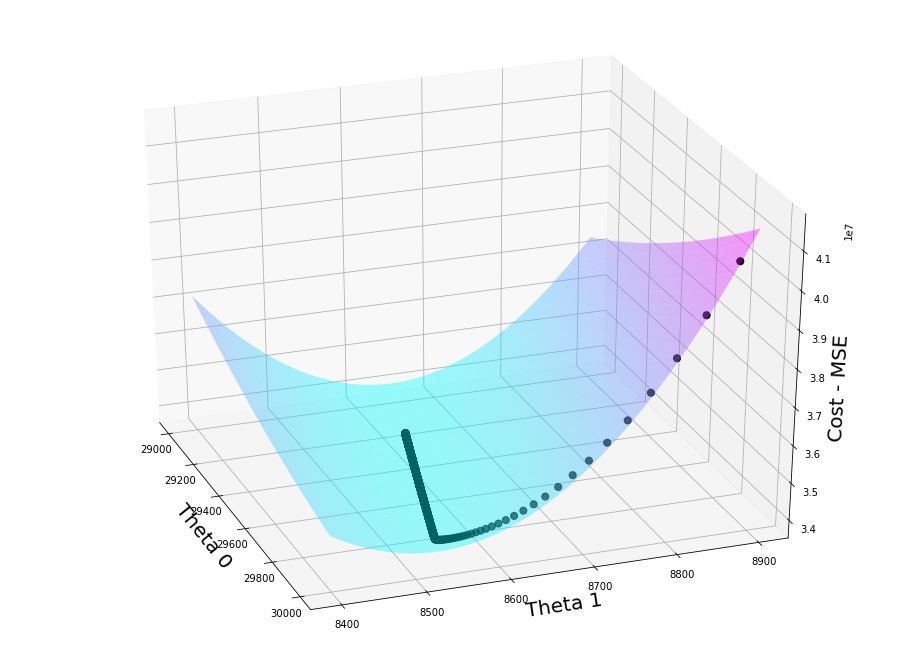

In [35]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)
ax.azim = -20
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=50, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap='cool', alpha =0.4)
plt.show()
nr_thetas =0 # restting nr_thetas values to zero....so error will not be shown when the notebook is re-run

In [36]:
intercept = thetas[0]
intercept

29302.8159136654

In [37]:
slope = thetas[1]
slope

8610.15431886396

In [38]:
y_train_opt = intercept + slope * X_train

In [39]:
r2_score(y_train, y_train_opt)

0.9674494451789896

In [40]:
y_test_opt = intercept + slope * X_test

In [41]:
r2_score(y_test, y_test_opt)

0.9159585112373719